<h1 style="text-align:center">Mid-Term 1</h1>
<h3 style="text-align:center">MCHE485: Mechanical Vibrations &mdash; Spring 2016</h3> 
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
<a href="http://www.ucs.louisiana.edu/~jev9637/">http://www.ucs.louisiana.edu/~jev9637/</a></p>

This notebook contains select solutions to the problems from the first mid-term in the Spring semester of 2016.

In [1]:
import numpy as np                  # import NumPy with the namespace np
from scipy.integrate import odeint  # import the ODE solver for simluation

In [2]:
%matplotlib inline

# import the plotting functions
import matplotlib.pyplot as plt

## Problem 1
The system in Figure 1 consists of mass, $m$, connected to ground through springs of spring constants $k_1$ and $k_2$ and a damper of damping coefficient $c$.

<p style="text-align:center">
	<img src="http://shared.crawlab.org/MultiSpring_Parallel_Damped.png" alt="Mass-spring-damper System" width=50%><br>
    <strong>Figure 1: Mass-spring-damper System</strong>
</p>

Its equations of motion is:

$ \quad m\ddot{x} + c\dot{x} + \frac{k_1 k_2}{k_1 + k_2} x = 0 $

### Part d.
Plot the response, $x(t)$, to initial conditions:

$ \quad x(0) = x_0 \quad \mbox{and} \quad  \dot{x}(0) = v_0$

for damping ratios of $\zeta = 0.0$, $\zeta = 0.2$, and $\zeta = 0.7$. Be sure to clearly label the axes and differentiate between the responses.

In [3]:
# define the system paramters
m = 1.0          # mass (kg)
k1 = 5.0         # k1 spring constant (N/m)
k2 = 5.0         # k2 spring constant (N/m)

# define the natural frequency (rad/s)
wn = (k1 * k2) / (m * (k1 + k2))  

In [4]:
def eq_of_motion(w, t, p):
    """
    Defines the differential equations for the mass-spring-damper system.

    Arguments:
        w :  vector of the state variables:
        t :  time
        p :  vector of the parameters:
            wn = natural frequency (rad/s)
            zeta = damping ratio
    """
    x, x_dot = w
    wn, zeta = p

    # Create sysODE = (x', x_dot')
    sysODE = [x_dot,
              -wn**2 * x - 2 * zeta * wn * x_dot]
    return sysODE

Now, let's simluate the system for each damping ratio of interest. We'll first set up the simluation parameters, including the desired initial conditions. Then, we'll solve the simluation three times, once for each damping ratio.

Fro each, we will use the ode solver, ```odeint()```, from the SciPy library. For more information on ```odeint```, see [the SciPy documentation](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html).

In [5]:
# Set up simulation parameters

# ODE solver parameters
abserr = 1.0e-9
relerr = 1.0e-9
max_step = 0.01
stoptime = 10.0
numpoints = 10001

# Create the time samples for the output of the ODE solver
t = np.linspace(0.0, stoptime, numpoints)

# Initial conditions
x_init = 1.0                        # initial position
x_dot_init = 2.0                    # initial velocity

# Pack the initial conditions into a list
x0 = [x_init, x_dot_init]

In [6]:
# zeta = 0.0 case
# Define the damping ratio
zeta = 0.0

# Pack the damping ratio and natural frequency
p = [wn, zeta]
resp_zeta0p0 = odeint(eq_of_motion, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)


# zeta = 0.2 case
# Define the damping ratio
zeta = 0.2

# Pack the damping ratio and natural frequency
p = [wn, zeta]
resp_zeta0p2 = odeint(eq_of_motion, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)


# zeta = 0.7 case
# Define the damping ratio
zeta = 0.7

# Pack the damping ratio and natural frequency
p = [wn, zeta]
resp_zeta0p7 = odeint(eq_of_motion, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

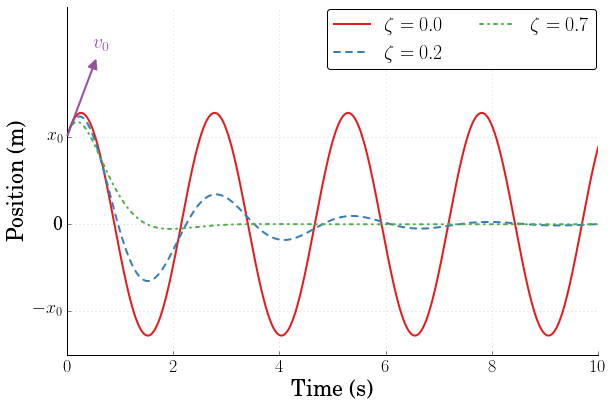

In [7]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Position (m)', family='serif', fontsize=22, weight='bold', labelpad=5)

plt.plot(t, resp_zeta0p0[:,0], linewidth=2, linestyle='-', label=r'$\zeta = 0.0$')
plt.plot(t, resp_zeta0p2[:,0], linewidth=2, linestyle='--', label=r'$\zeta = 0.2$')
plt.plot(t, resp_zeta0p7[:,0], linewidth=2, linestyle='-.', label=r'$\zeta = 0.7$')

plt.annotate('$v_0$',
         xy=(0.0, 1), xycoords='data',
         xytext=(0.5, 2), textcoords='data', fontsize=20,
         arrowprops=dict(arrowstyle='<|-', linewidth = 2, color="#984ea3"), color = "#984ea3")



# uncomment below and set limits if needed
# plt.xlim(0, 5)
plt.ylim(-1.5, 2.5)
plt.yticks([-1, 0, 1], [r'$-x_0$', '0', '$x_0$'])

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 2, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext, family='serif', fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Uncomment to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('MCHE485_Midterm1_Prob1d_Spring2016.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

## Problem 2
The system in Figure 2 consists of mass $m$ attached to the end of a massless, inextensible link of length $l$. The mass is also connected to a spring, $k$, the other end of which is connected to an always-horizontal displacement input $y$.

<p style="text-align:center">
	<img src="http://shared.crawlab.org/Pendulum_SpringAtEnd.png" alt="Pendulum with Spring at End" width=35%><br>
    <strong>Figure 2: Pendulum with Spring at End</strong>
</p>

In [8]:
# Define the system parameters
m = 1.0    # mass (kg)
k = 2.0    # spring constant (N/m)
l = 1.0    # link length (m)
g = 9.81   # gravity (m/s^2)

# Now, define the natural frequency
wn = np.sqrt((m * g + k * l) / (m * l))

In [9]:
# Set up input parameters
w = np.linspace(0.01,3*wn,1000)   # Frequency range for freq response plot, 0-3x wn with 1000 points in-between

# Define the transfer function
TF_amp = (k / (m*l)) / (wn**2 - w**2)

# Let's mask the discontinuity, so it isn't plotted
pos = np.where(np.abs(TF_amp) >= 25)
TF_amp[pos] = np.nan
w[pos] = np.nan

# Now define the magnitude and phase of this TF
TF_mag = np.sqrt(TF_amp**2)
TF_phase = -np.arctan2(0, TF_amp)

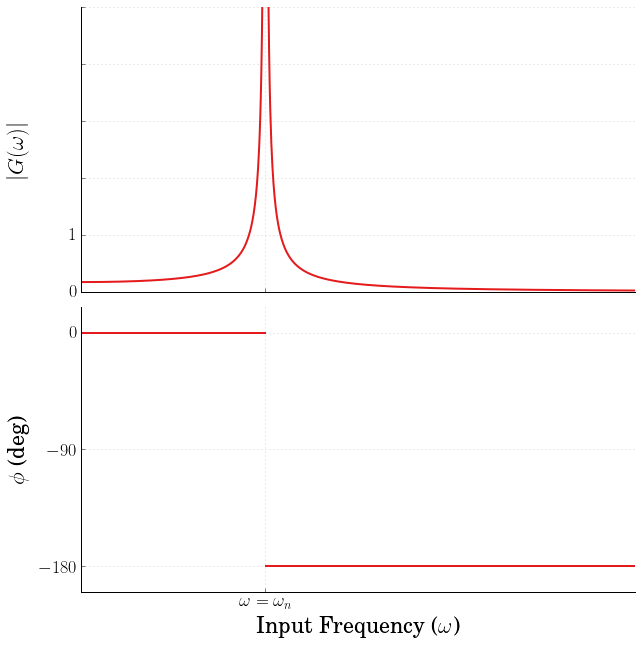

In [10]:
# Let's plot the magnitude and phase as subplots, to make it easier to compare

# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(8,8))

plt.subplots_adjust(bottom=0.12,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
ax1.grid(True,linestyle=':',color='0.75')
ax1.set_axisbelow(True)

ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')
ax2.grid(True,linestyle=':',color='0.75')
ax2.set_axisbelow(True)

plt.xlabel(r'Input Frequency ($\omega$)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.xticks([0, wn], ['', '$\omega = \omega_n$'])

# Magnitude plot
ax1.set_ylabel(r'$ |G(\omega)| $', family='serif', fontsize=22, weight='bold', labelpad=40)
ax1.plot(w, TF_mag, linewidth=2)

ax1.set_ylim(0.0, 5.0)
ax1.set_yticks([0, 1, 2, 3, 4, 5])
ax1.set_yticklabels(['$0$', '$1$', '', '', '', ''])
plt.setp(ax1.get_ymajorticklabels(),family='serif', fontsize=18, weight = 'light')

# Phase plot 
ax2.set_ylabel(r'$ \phi $ (deg)',family='serif',fontsize=22,weight='bold',labelpad=10)
ax2.plot(w, TF_phase * 180/np.pi, linewidth=2)
ax2.set_ylim(-200.0, 20.0,)
ax2.set_yticks([0, -90, -180])

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# If you want to save the figure, uncomment the commands below. 
# The figure will be saved in the same directory as your IPython notebook.
# Save the figure as a high-res pdf in the current folder
plt.savefig('MCHE485_Midterm1_Prob2f_Spring2016', dpi=300)

fig.set_size_inches(9,9) # Resize the figure for better display in the notebook

## Problem 3
The system in Figure 3 consists of a thin rod of mass $m$ and length $l$. It is connected to ground via a a spring, $k$, at a distance of $l_1$ from the rod's perfect-pin pivot point and a damper attached at distance $l_2$ from the pivot. There is a pure torque, $\tau$, acting on the rod. You can ignore any gravitational effects and assume that the spring is at its equilibrium when $\theta = 0$.

<p style="text-align:center">
	<img src="http://shared.crawlab.org/Horiz_BarSpringDamper_DirectTorque.png" alt="A Thin Rod with a Direct Torque Input" width=50%><br>
    <strong>Figure 3: A Thin Rod with a Direct Torque Input</strong>
</p>

In [11]:
# Define the system parameters
m = 1.0              # mass (kg)
k = 2.0              # spring constant (N/m)
c = 1.0              # damping coefficient (Ns/m)
l = 2.0              # total link length (m)
l1 = 1.0             # length to spring connection (m)
l2 = 1.5             # length to damper connection (m)

Io = 1/3 * m * l**2  # The rod moment of intertia about the pin joint

wn = np.sqrt(k*l1**2 / Io)  # Define the natural frequency

# Define the damping ratio
zeta = (c * l2**2 / Io) / (2 * wn)

In [12]:
# Set up input parameters
w = np.linspace(0.01, 3*wn, 1000)   # Frequency range for freq response plot, 0-3x wn with 1000 points in-between
   
# The undamped case
zeta = 0
TF_mag_0p0 = 1 / (Io * np.sqrt((wn**2 - w**2)**2 + (2 * zeta * w * wn)**2))
TF_phase_0p0 = -np.arctan2(2 * zeta * w * wn, wn**2 - w**2)

# Let's mask the discontinuity in the undamped case, so it isn't plotted
pos = np.where(np.abs(TF_mag_0p0) >= 25)
TF_mag_0p0[pos] = np.nan
TF_phase_0p0[pos] = np.nan
# w[pos] = np.nan

# The zeta = 0.2 case
zeta = 0.2
TF_mag_0p2 = 1 / (Io * np.sqrt((wn**2 - w**2)**2 + (2 * zeta * w * wn)**2))
TF_phase_0p2 = -np.arctan2(2 * zeta * w * wn, wn**2 - w**2)

# The zeta = 0.7 case
zeta = 0.7
TF_mag_0p7 = 1 / (Io * np.sqrt((wn**2 - w**2)**2 + (2 * zeta * w * wn)**2))
TF_phase_0p7 = -np.arctan2(2 * zeta * w * wn, wn**2 - w**2)

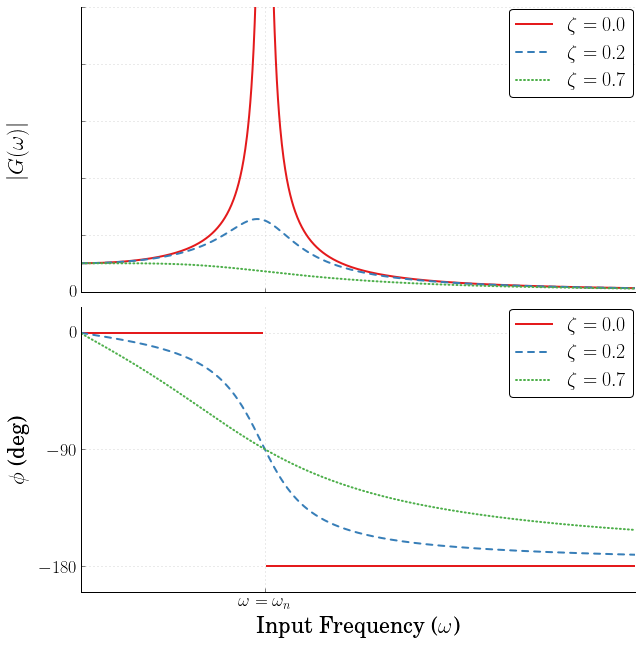

In [13]:
# Let's plot the magnitude and phase as subplots, to make it easier to compare

# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(8,8))

plt.subplots_adjust(bottom=0.12,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
ax1.grid(True,linestyle=':',color='0.75')
ax1.set_axisbelow(True)

ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')
ax2.grid(True,linestyle=':',color='0.75')
ax2.set_axisbelow(True)

plt.xlabel(r'Input Frequency ($\omega$)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.xticks([0, wn], ['', '$\omega = \omega_n$'])

# Magnitude plot
ax1.set_ylabel(r'$ |G(\omega)| $', family='serif', fontsize=22, weight='bold', labelpad=40)
ax1.plot(w, TF_mag_0p0, linewidth=2, linestyle = '-', label = r'$\zeta = 0.0$')
ax1.plot(w, TF_mag_0p2, linewidth=2, linestyle = '--', label = r'$\zeta = 0.2$')
ax1.plot(w, TF_mag_0p7, linewidth=2, linestyle = ':', label = r'$\zeta = 0.7$')

ax1.set_ylim(0.0, 5.0)
ax1.set_yticks([0, 1, 2, 3, 4, 5])
ax1.set_yticklabels(['$0$', '', '', '', '', ''])
plt.setp(ax1.get_ymajorticklabels(),family='serif', fontsize=18, weight = 'light')


# Create the legend, then fix the fontsize
leg = ax1.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext, family='serif', fontsize=20)



# Phase plot 
ax2.set_ylabel(r'$ \phi $ (deg)',family='serif',fontsize=22,weight='bold',labelpad=10)
ax2.plot(w, TF_phase_0p0 * 180/np.pi, linewidth=2, linestyle = '-', label = r'$\zeta = 0.0$')
ax2.plot(w, TF_phase_0p2 * 180/np.pi, linewidth=2, linestyle = '--', label = r'$\zeta = 0.2$')
ax2.plot(w, TF_phase_0p7 * 180/np.pi, linewidth=2, linestyle = ':', label = r'$\zeta = 0.7$')

ax2.set_ylim(-200.0, 20.0,)
ax2.set_yticks([0, -90, -180])


# Create the legend, then fix the fontsize
leg = ax2.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext, family='serif', fontsize=20)



# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# If you want to save the figure, uncomment the commands below. 
# The figure will be saved in the same directory as your IPython notebook.
# Save the figure as a high-res pdf in the current folder
# plt.savefig('MCHE485_Midterm1_Prob3d_Spring2016', dpi=300)

fig.set_size_inches(9,9) # Resize the figure for better display in the notebook

## Problem 4
The transportation of liquid can result in liquid-sloshing conditions that result in spills, leading to dangerous conditions. As a first approximation, the simple model shown in Figure 4 can be used to describe the liquid sloshing inside the container. In this model, the liquid sloshing may be represented by the horizontal motion, $x$, of the liquid mass, $m$, connected by a springs, $k$, and dampers, $c$, to the container walls, which are considered to be rigid. The displacement of the container is described by $y$. 

<p style="text-align:center">
	<img src="http://shared.crawlab.org/Sloshing_BaseExcitation.png" alt="Simplified Liquid Sloshing Model" width=35%><br>
    <strong>Figure 4: Simplified Liquid Sloshing Model</strong>
</p>

In [14]:
# Define the system parameters
m = 1.0         # mass (kg)
k = 5.0         # spring constant (N/m)

# define the natural frequency (rad/s)
wn = np.sqrt((2 * k) / m)

In [15]:
# Set up input parameters
w = np.linspace(0.01, 3 * wn, 1000)   # Frequency range for freq response plot, 0-3x wn with 1000 points in-between


# Now, define the parameters and TF magnitude and phase for each damping ratio

# The undamped case
zeta = 0
TF_mag_0p0 = np.sqrt(wn**4 + (2 * zeta * w * wn)**2) / np.sqrt((wn**2 - w**2)**2 + (2 * zeta * w * wn)**2)
TF_phase_0p0 = np.arctan2(2 * zeta * w, wn) - np.arctan2(2 * zeta * w * wn, wn**2 - w**2)

# Let's mask the discontinuity in the undamped case, so it isn't plotted
pos = np.where(np.abs(TF_mag_0p0) >= 25)
TF_mag_0p0[pos] = np.nan
TF_phase_0p0[pos] = np.nan
# w[pos] = np.nan

# The zeta = 0.2 case
zeta = 0.2
TF_mag_0p2 = np.sqrt(wn**4 + (2 * zeta * w * wn)**2) / np.sqrt((wn**2 - w**2)**2 + (2 * zeta * w * wn)**2)
TF_phase_0p2 = np.arctan2(2 * zeta * w, wn) - np.arctan2(2 * zeta * w * wn, wn**2 - w**2)

# The zeta = 0.7 case
zeta = 0.7
TF_mag_0p7 = np.sqrt(wn**4 + (2 * zeta * w * wn)**2) / np.sqrt((wn**2 - w**2)**2 + (2 * zeta * w * wn)**2)
TF_phase_0p7 = np.arctan2(2 * zeta * w, wn) - np.arctan2(2 * zeta * w * wn, wn**2 - w**2)

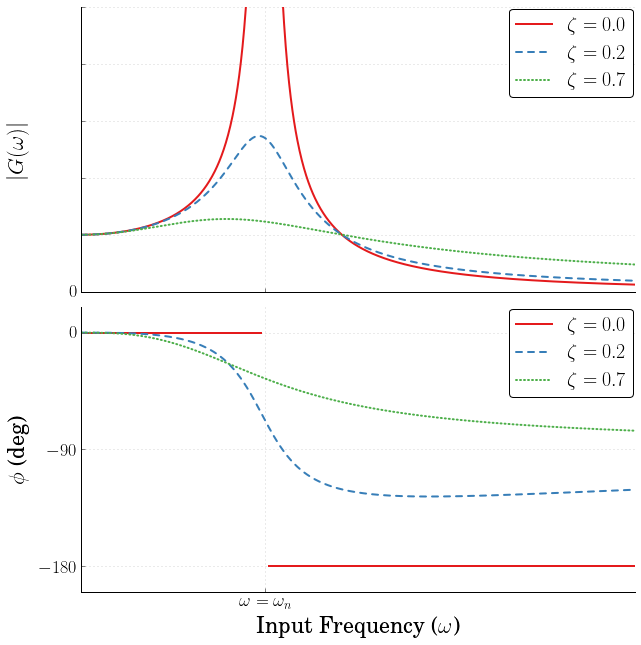

In [16]:
# Let's plot the magnitude and phase as subplots, to make it easier to compare

# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(8,8))

plt.subplots_adjust(bottom=0.12,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
ax1.grid(True,linestyle=':',color='0.75')
ax1.set_axisbelow(True)

ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')
ax2.grid(True,linestyle=':',color='0.75')
ax2.set_axisbelow(True)

plt.xlabel(r'Input Frequency ($\omega$)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.xticks([0, wn], ['', '$\omega = \omega_n$'])

# Magnitude plot
ax1.set_ylabel(r'$ |G(\omega)| $', family='serif', fontsize=22, weight='bold', labelpad=40)
ax1.plot(w, TF_mag_0p0, linewidth=2, linestyle = '-', label = r'$\zeta = 0.0$')
ax1.plot(w, TF_mag_0p2, linewidth=2, linestyle = '--', label = r'$\zeta = 0.2$')
ax1.plot(w, TF_mag_0p7, linewidth=2, linestyle = ':', label = r'$\zeta = 0.7$')

ax1.set_ylim(0.0, 5.0)
ax1.set_yticks([0, 1, 2, 3, 4, 5])
ax1.set_yticklabels(['$0$', '', '', '', '', ''])
plt.setp(ax1.get_ymajorticklabels(),family='serif', fontsize=18, weight = 'light')


# Create the legend, then fix the fontsize
leg = ax1.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext, family='serif', fontsize=20)



# Phase plot 
ax2.set_ylabel(r'$ \phi $ (deg)',family='serif',fontsize=22,weight='bold',labelpad=10)
ax2.plot(w, TF_phase_0p0 * 180/np.pi, linewidth=2, linestyle = '-', label = r'$\zeta = 0.0$')
ax2.plot(w, TF_phase_0p2 * 180/np.pi, linewidth=2, linestyle = '--', label = r'$\zeta = 0.2$')
ax2.plot(w, TF_phase_0p7 * 180/np.pi, linewidth=2, linestyle = ':', label = r'$\zeta = 0.7$')

ax2.set_ylim(-200.0, 20.0,)
ax2.set_yticks([0, -90, -180])


# Create the legend, then fix the fontsize
leg = ax2.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext, family='serif', fontsize=20)



# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# If you want to save the figure, uncomment the commands below. 
# The figure will be saved in the same directory as your IPython notebook.
# Save the figure as a high-res pdf in the current folder
# plt.savefig('MCHE485_Midterm1_Prob4d_Spring2016', dpi=300)

fig.set_size_inches(9,9) # Resize the figure for better display in the notebook

<hr class = "style-end">

 #### Licenses
Code is licensed under a 3-clause BSD style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.

In [17]:
# Ignore this cell - We just update the CSS to make the notebook look a little bit better and easier to read

# Improve the notebook styling -- Run this first
import codecs
from IPython.core.display import HTML
css_file = 'styling/CRAWLAB_IPythonNotebook.css'
HTML(codecs.open(css_file, 'r', 'utf-8').read())